<a href="https://colab.research.google.com/github/ajit04022000/MACHINE_LEARNING/blob/main/2)Multiple_Linear_Regression_CWB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##</b>Hear we can see that the data set contain more independent variable so its a multiple linear regression problem<b>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model

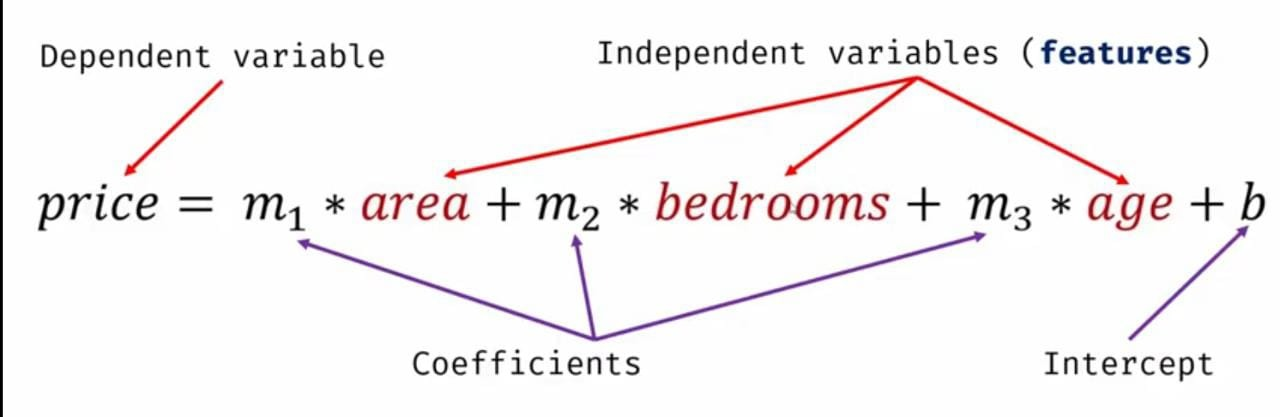

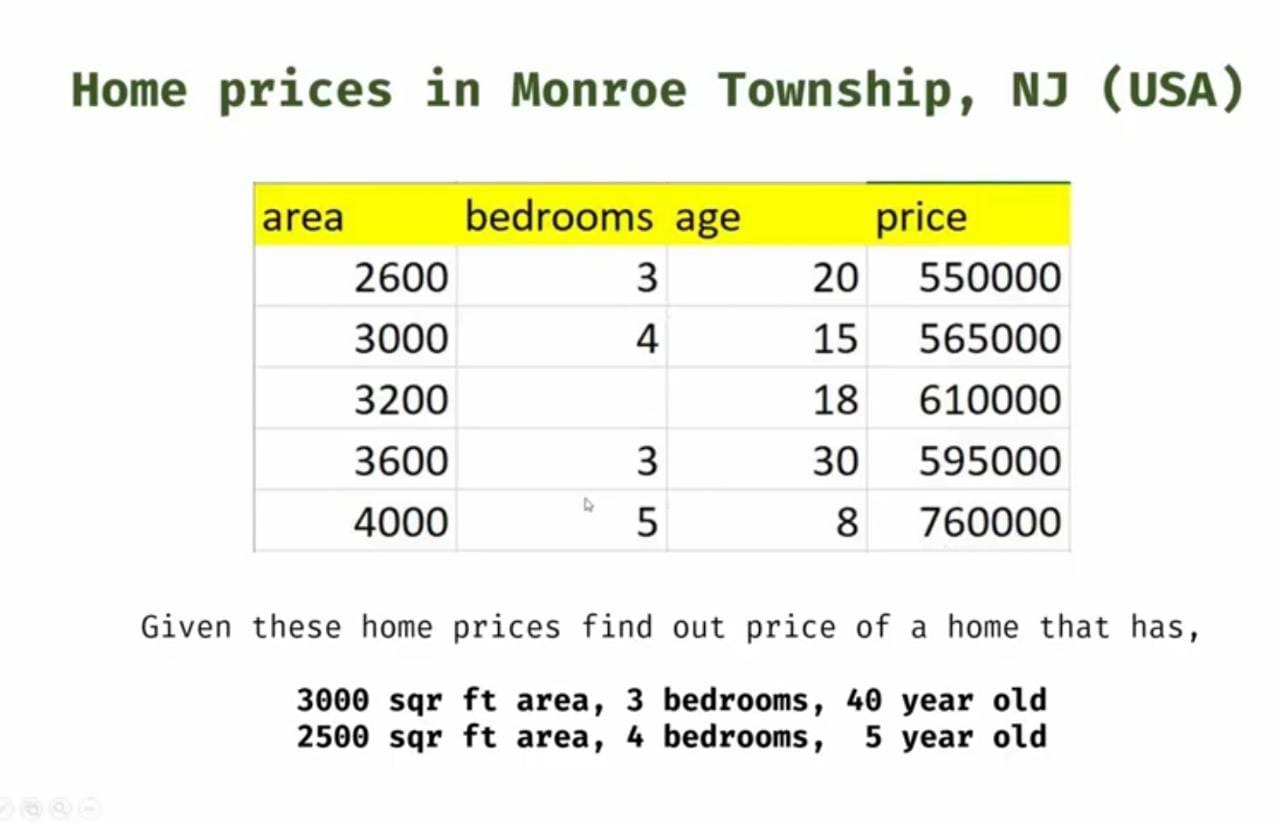

In [120]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


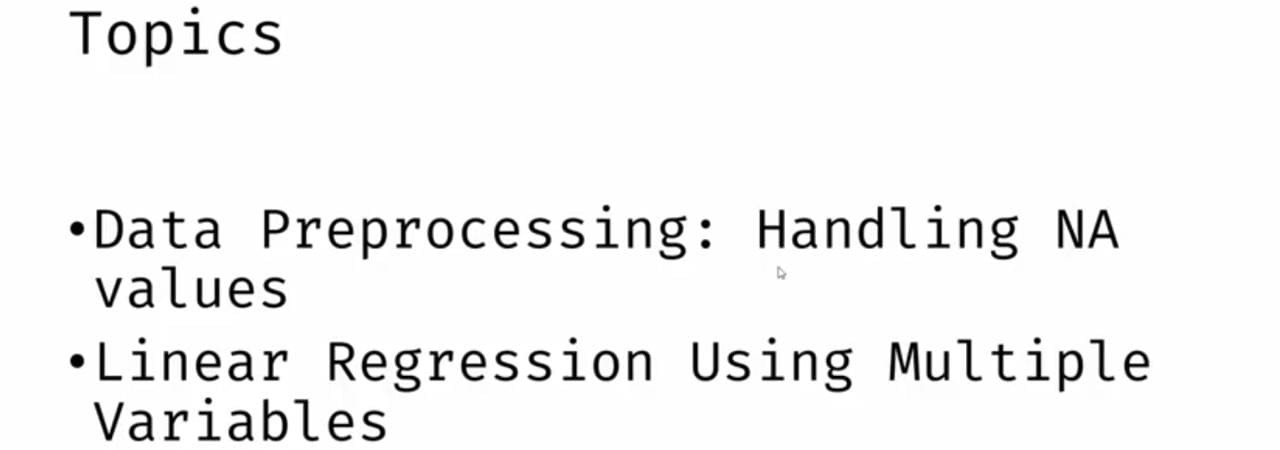

In [121]:
import math
df.bedrooms.median()

4.0

In [122]:
null = df.isna().sum().sort_values(ascending = False)
null

bedrooms    1
area        0
age         0
price       0
dtype: int64

In [123]:
df['bedrooms'].fillna(df['bedrooms'].median(),inplace= True)

In [124]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [125]:
model = linear_model.LinearRegression()
model.fit(df.drop('price',axis=1),df.price)

LinearRegression()

In [126]:
# as for our question need to find the price when the sqrt=3000 ,bedroom = 3 and the age =40
model.predict([[3000,3,40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [127]:
model.predict([[1800,3,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([460884.85850873])

In [128]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [129]:
model.intercept_

221323.00186540396

In [130]:
# lets try this in our formula y = m1*x1 + m2*x2 + m3*x3 +c
y = 112.06244194*3000+23388.88007794*3+-3231.71790863*40 + 221323.00186540396
print(y)
print('ohh nice it predicting accurately')

498408.251574024
ohh nice it predicting accurately


In [131]:
model.predict([[2500,4,5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([578876.03748933])

## Excercise

This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

* 2 yr experience, 9 test score, 6 interview score

* 12 yr experience, 10 test score, 10 interview score

In [132]:
import pandas as pd 
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model


In [133]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [134]:
## hear we can see that the data set experience column contain more nan value , the test_score also contain nan value so at 1st we need to cleen this 
null = df.isna().sum().sort_values(ascending= False)
null

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [135]:
df.experience = df.experience.fillna("zero")
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(),inplace = True)

In [136]:
df.isna().sum().sort_values(ascending= False)

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [137]:
df.rename(columns = {'experience':'experience','test_score(out of 10)' :'test_score','interview_score(out of 10)':'interview_score','salary($)':'salary'}, inplace=True)
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [141]:
pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=d34ce19a9e3f9d91827546319d542e1f0c17d7e84e3c3af09c7fa61c395db1f2
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [143]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [144]:
model = linear_model.LinearRegression()
model.fit(df.drop('salary',axis=1),df.salary)

LinearRegression()

In [145]:
model.predict([[2,9,6]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([53205.96797671])

In [146]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [147]:
model.intercept_

17737.263464337695

In [149]:
y = 2812.95487627*2 + 1845.70596798*9 + 2205.24017467*6 + 17737.263464337695
y

53205.9679767177